In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

data = pd.read_csv('./data_for_student_case.csv', sep = ',')
data = data.dropna()

data = data[data['simple_journal'] != 'Refused']

#print(data.dtypes)
print(data.head())

labels = data['simple_journal']
print("Number of non-fraud: ", np.sum(labels == 'Settled'), ", with ratio: ", np.sum(labels == 'Settled')/len(labels))
print("Number of fraud: ", np.sum(labels == 'Chargeback'), ", with ratio: ", np.sum(labels == 'Chargeback')/len(labels))
print("Number refused: ", np.sum(labels == 'Refused'), ", with ratio: ", np.sum(labels == 'Refused')/len(labels))

data.groupby(by = 'simple_journal').count()

   txid          bookingdate issuercountrycode txvariantcode       bin  \
0     1  2015-11-09 14:26:51                MX      mccredit  530056.0   
1     2  2015-11-09 14:27:38                MX      mccredit  547046.0   
2     3  2015-11-23 16:34:16                MX      mccredit  528843.0   
3     4  2015-11-23 16:34:51                MX      mccredit  547146.0   
4     5  2015-11-09 14:26:08                MX   visaclassic  477291.0   

     amount currencycode shoppercountrycode shopperinteraction simple_journal  \
0   64800.0          MXN                 MX          Ecommerce     Chargeback   
1   44900.0          MXN                 MX          Ecommerce     Chargeback   
2  149900.0          MXN                 MX          Ecommerce     Chargeback   
3  109900.0          MXN                 MX          Ecommerce     Chargeback   
4   89900.0          MXN                 MX          Ecommerce     Chargeback   

  cardverificationcodesupplied  cvcresponsecode         creationdate

,txid,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,cardverificationcodesupplied,cvcresponsecode,creationdate,accountcode,mail_id,ip_id,card_id
simple_journal,,,,,,,,,,,,,,,,
Chargeback,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345
Settled,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165


In [3]:
data_cat = data.copy(True)

label_mapping = {}

# Convert currency code in order to 'amount' in a single code
label_mapping['currencycode'] = {'SEK': 0.09703, 'MXN': 0.04358, 'AUD': 0.63161, 'NZD': 0.58377, 'GBP':1.13355} 
data.replace({'currencycode' : label_mapping['currencycode']}, inplace=True)
data['amount'] = data['amount'] * data['currencycode']

label_mapping['simple_journal'] = {'Settled': 0, 'Chargeback' : 1}
data.replace({'simple_journal' : label_mapping['simple_journal']}, inplace=True)

# Convert all the rest columns which are of type 'object'
char_cols = data.dtypes.pipe(lambda x: x[x == 'object']).index

for c in char_cols:
    data[c], label_mapping[c] = pd.factorize(data[c])

label_mapping

{'currencycode': {'SEK': 0.09703,
  'MXN': 0.04358,
  'AUD': 0.63161,
  'NZD': 0.58377,
  'GBP': 1.13355},
 'simple_journal': {'Settled': 0, 'Chargeback': 1},
 'bookingdate': Index(['2015-11-09 14:26:51', '2015-11-09 14:27:38', '2015-11-23 16:34:16',
        '2015-11-23 16:34:51', '2015-11-09 14:26:08', '2015-11-09 14:26:25',
        '2015-11-09 14:26:47', '2015-11-23 16:34:29', '2015-12-08 19:58:35',
        '2015-11-09 14:25:50',
        ...
        '2015-11-03 08:12:13', '2015-11-03 08:12:14', '2015-11-03 22:33:58',
        '2015-11-03 18:57:00', '2015-11-02 20:34:44', '2015-11-02 20:34:30',
        '2015-10-31 20:04:21', '2015-10-31 22:03:39', '2015-11-02 20:16:57',
        '2015-11-03 18:57:01'],
       dtype='object', length=39902),
 'issuercountrycode': Index(['MX', 'SA', 'CA', 'AR', 'CL', 'CO', 'FR', 'US', 'JP', 'AE',
        ...
        'BB', 'CW', 'AZ', 'AM', 'DO', 'AI', 'MN', 'TM', 'BZ', 'ME'],
       dtype='object', length=115),
 'txvariantcode': Index(['mccredit', 'visacla

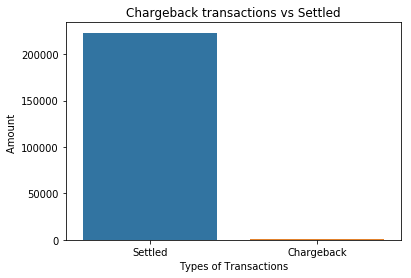

In [4]:
import seaborn as sns
ax = data_cat['simple_journal'].value_counts()
plt.title('Chargeback transactions vs Settled')
sns.barplot(x=ax.index, y= ax)  # for pretty visualization
plt.xlabel('Types of Transactions')
plt.ylabel('Amount ')
plt.show()


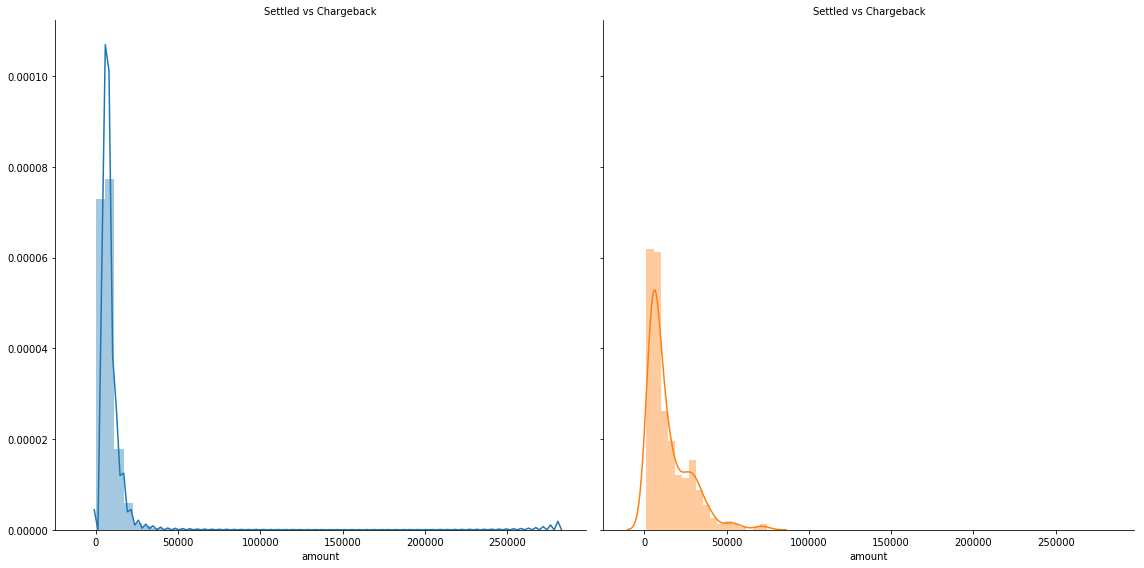

In [10]:
g = sns.FacetGrid(data, col="simple_journal", height=8, hue='simple_journal')
g.map(sns.distplot,"amount",kde=True)
g.set_titles('Settled vs Chargeback')


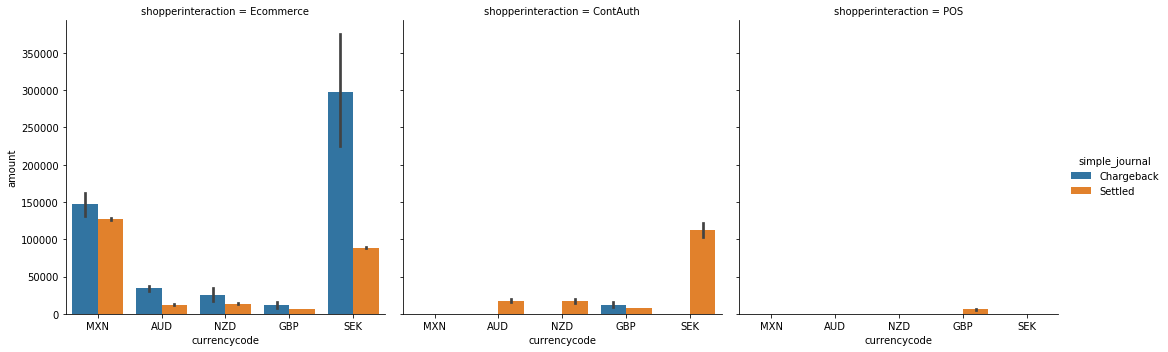

In [11]:
sns.catplot(data=data_cat,x="currencycode", y="amount", hue="simple_journal",kind='bar',col='shopperinteraction')

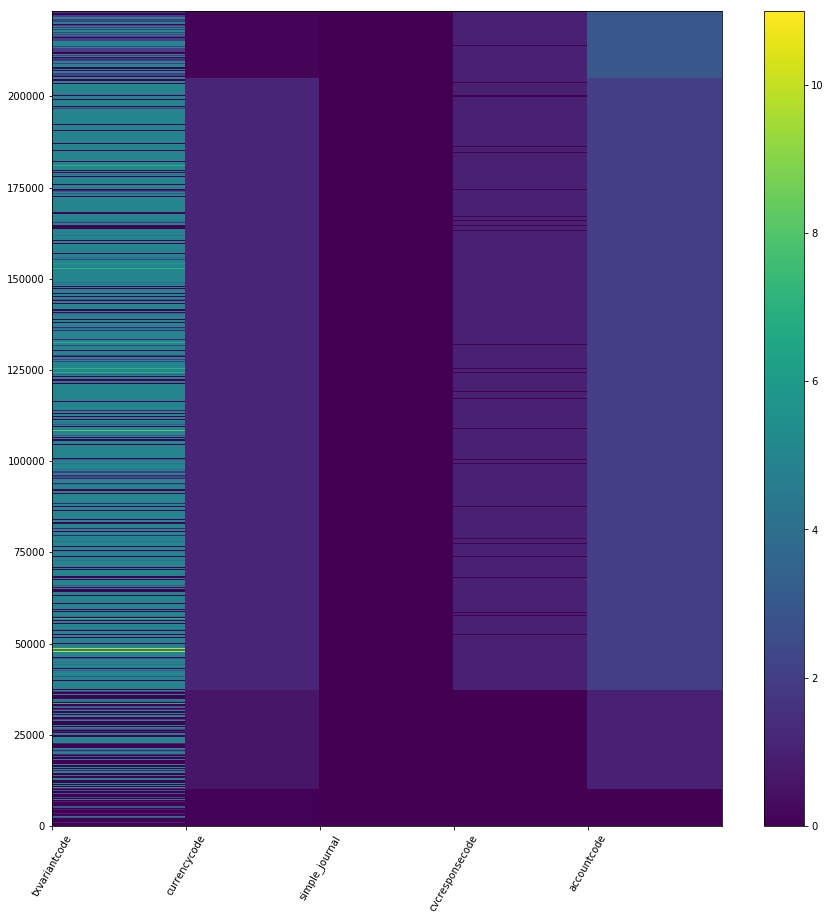

In [12]:
labels = ['txvariantcode', 'currencycode', 'simple_journal',  
           'cvcresponsecode', 'accountcode']

plt.figure(figsize = (15,15))
plt.pcolor(data[labels])
plt.xticks(np.arange(len(labels)), labels, rotation = 60)
plt.colorbar()

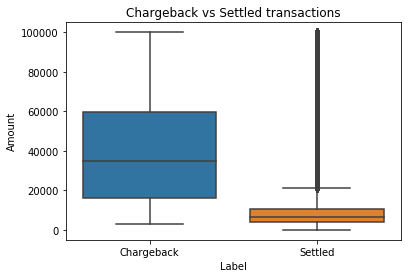

In [41]:
plt.title('Chargeback vs Settled transactions')
sns.boxplot(x="simple_journal", y="amount", data=data_cat[data_cat['amount']<= 100000])  
plt.xlabel('Label')
plt.ylabel('Amount')
plt.show()

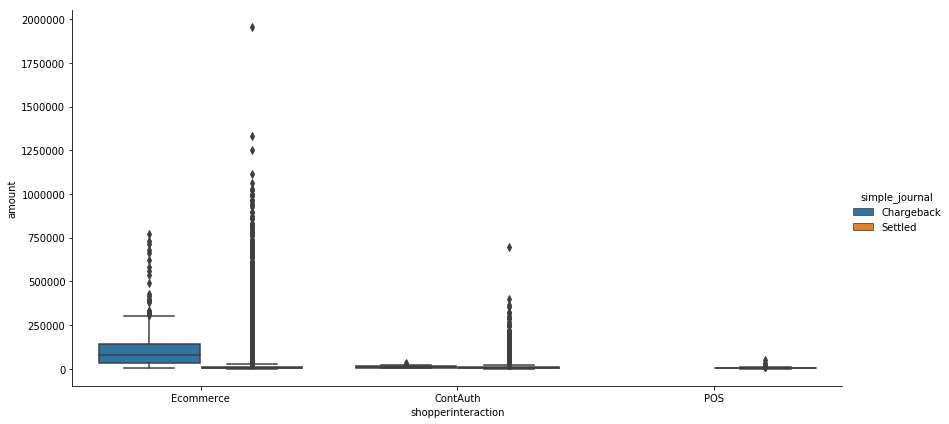

In [42]:
sns.catplot(data= data_cat,x="shopperinteraction", y="amount", hue="simple_journal",kind='box',height=6, aspect=2)

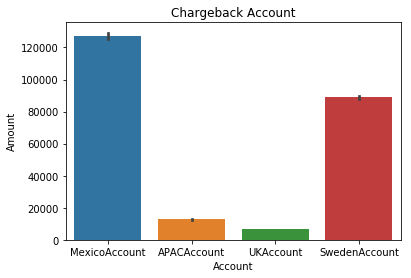

In [45]:
settled =data_cat.loc[data_cat['simple_journal']!='Chargeback']
plt.title('Chargeback Account')
sns.barplot(x="accountcode", y="amount", data=settled)  
plt.xlabel('Account')
plt.ylabel('Amount')
plt.show()



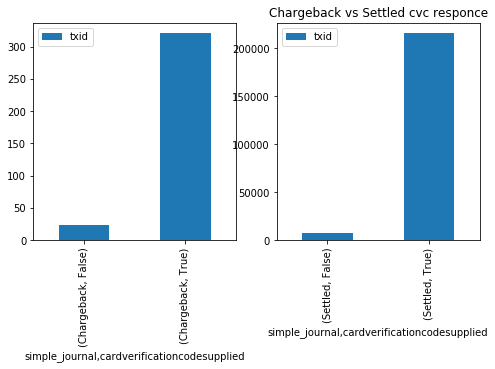

In [49]:
chargeback = data_cat.loc[data_cat['simple_journal']=='Chargeback']
settled = data_cat.loc[data_cat['simple_journal']!='Chargeback']

fig, axes = plt.subplots(figsize=(8,4) ,nrows=1, ncols=2)
p.title('Chargeback vs Settled cvc responce') 

new_df= chargeback[['simple_journal','cardverificationcodesupplied','txid']].groupby(['simple_journal','cardverificationcodesupplied']).count().plot(ax=axes[0],kind='bar')


new_df2= settled[['simple_journal','cardverificationcodesupplied','txid']].groupby(['simple_journal','cardverificationcodesupplied']).count().plot(ax=axes[1], kind='bar')


